## Fichier de test pour la classe Lineaire

In [1]:
import sys
sys.path.insert(0, '../src')

from Linear import Linear
from loss.MSELoss import MSELoss
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def main_lineaire(X_train, y_train, nombre_neurone , n_iter = 200,learning_rate = 0.001):
    # nombre_neurone = y_train.shape[1]
    modele = Linear(X_train.shape[1],nombre_neurone)
    loss = MSELoss()
    train_loss = []

    for _ in range(n_iter):
        # phase forward
        y_hat = modele.forward(X_train)

        # retro propagation du gradient de la loss par rapport aux parametres et aux entrees
        forward_loss = loss.forward(y_train,y_hat)
        print('Erreur moyenne loss :',forward_loss.mean())
        train_loss.append(forward_loss.mean()) # erreur

        backward_loss = loss.backward(y_train,y_hat)

        modele.backward_update_gradient(X_train,backward_loss)
        
        # mise a jour  de la matrice de poids 
        modele.update_parameters(learning_rate)
        modele.zero_grad() 
    
    return modele, train_loss

def affichage(X,y,modele,train_loss, opt):
    # Affichage de l'évolution de l'erreur
    plt.figure()
    plt.plot(range(len(train_loss)),train_loss,label = 'train_loss', color='green')
    plt.legend()
    plt.title('Erreur en fonction de litération')
    plt.xlabel('iterations')
    plt.ylabel('erreur')
    plt.grid()
    plt.savefig('figures/loss1_2.png')
    plt.show()

    plt.figure()
    if y.ndim == 1 : 
        y.reshape((-1,1))
        label = "w"+str(0)
        plt.title(f'w_hat = {np.round(modele._parameters[0][0],2)}, w* = {round(opt,2)}')
        plt.scatter(X,y)
        plt.plot(X,X*modele._parameters[0][0],label=label, color='g')
        plt.legend()
    else : 
        for i in range(modele._parameters.shape[1]):
            label = "w"+str(i)
            plt.title(f'w_hat = {modele._parameters[0][0]}, w* = {opt}')
            plt.scatter(X,y[:,i])
            plt.plot(X,X*modele._parameters[0][i],label=label, color='g')
            plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    # plt.savefig('figures/reg1_2.png')
    plt.show()
    return None

Erreur moyenne loss : 1152278.877143304
Erreur moyenne loss : 1148648.4873577312
Erreur moyenne loss : 1146265.721609871
Erreur moyenne loss : 1144701.8130891644
Erreur moyenne loss : 1143675.3504739576
Erreur moyenne loss : 1143001.6348560168
Erreur moyenne loss : 1142559.442040155
Erreur moyenne loss : 1142269.208068457
Erreur moyenne loss : 1142078.711913266
Erreur moyenne loss : 1141953.6786664769
Erreur moyenne loss : 1141871.6121404753
Erreur moyenne loss : 1141817.7470041555
Erreur moyenne loss : 1141782.3920253534
Erreur moyenne loss : 1141759.1863379218
Erreur moyenne loss : 1141743.9549572216
Erreur moyenne loss : 1141733.9576041854
Erreur moyenne loss : 1141727.3956733248
Erreur moyenne loss : 1141723.088631521
Erreur moyenne loss : 1141720.261621871
Erreur moyenne loss : 1141718.4060566793


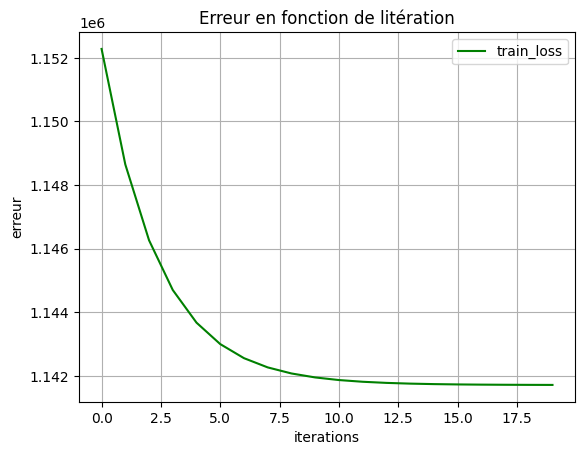

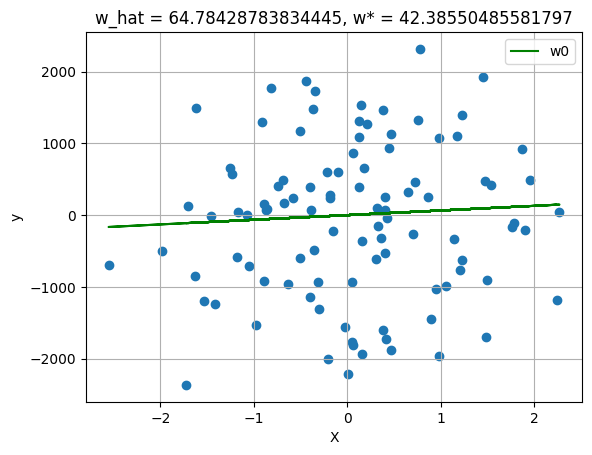

Erreur moyenne loss : 114889586.73836938
Erreur moyenne loss : 114638648.77227335
Erreur moyenne loss : 114475537.91267008
Erreur moyenne loss : 114369463.34887296
Erreur moyenne loss : 114300448.46523155
Erreur moyenne loss : 114255525.45763193
Erreur moyenne loss : 114226271.73940149
Erreur moyenne loss : 114207214.00185335
Erreur moyenne loss : 114194793.71345206
Erreur moyenne loss : 114186696.1498195
Erreur moyenne loss : 114181414.95822217
Erreur moyenne loss : 114177969.41980173
Erreur moyenne loss : 114175720.76450007
Erreur moyenne loss : 114174252.77639316
Erreur moyenne loss : 114173294.14966011
Erreur moyenne loss : 114172667.97192942
Erreur moyenne loss : 114172258.84245956
Erreur moyenne loss : 114171991.45982966
Erreur moyenne loss : 114171816.67273684
Erreur moyenne loss : 114171702.38912424


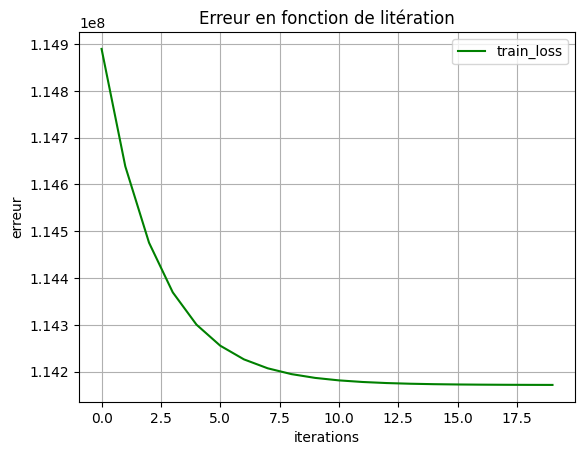

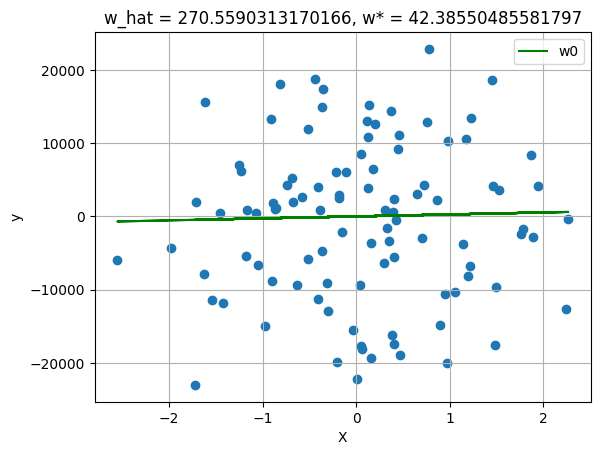

Erreur moyenne loss : 2871761428.490361
Erreur moyenne loss : 2865635391.457223
Erreur moyenne loss : 2861660846.7698784
Erreur moyenne loss : 2859080734.35874
Erreur moyenne loss : 2857404926.8454604
Erreur moyenne loss : 2856315909.516074
Erreur moyenne loss : 2855607863.276456
Erreur moyenne loss : 2855147293.118582
Erreur moyenne loss : 2854847564.193529
Erreur moyenne loss : 2854652421.7520866
Erreur moyenne loss : 2854525318.471355
Erreur moyenne loss : 2854442498.3847637
Erreur moyenne loss : 2854388512.445478
Erreur moyenne loss : 2854353309.0863867
Erreur moyenne loss : 2854330345.556416
Erreur moyenne loss : 2854315361.231866
Erreur moyenne loss : 2854305580.4675083
Erreur moyenne loss : 2854299194.3207726
Erreur moyenne loss : 2854295023.4274797
Erreur moyenne loss : 2854292298.6112695


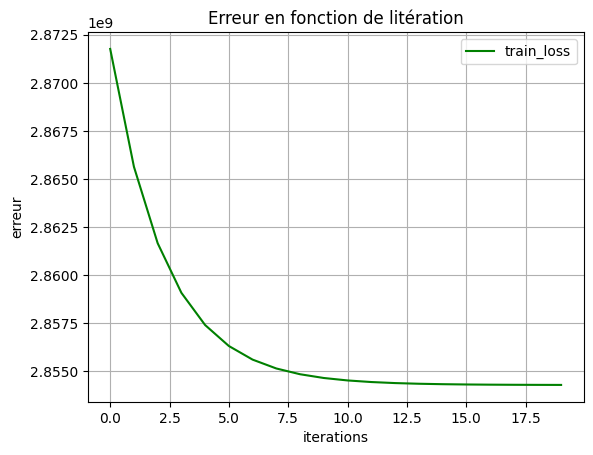

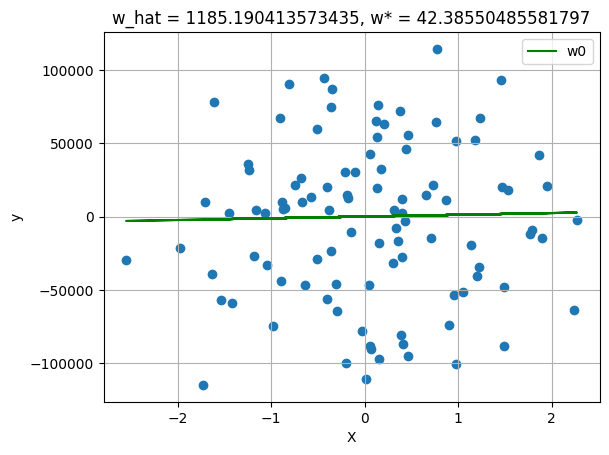

In [3]:
# Génération des points
nombre_dim_y = 1
# X, y, coef = make_regression(n_samples=100, n_features=1,bias=0.5,noise=10,n_targets=nombre_dim_y, random_state=0, coef=True)
# if y.ndim == 1 :
#     y = y.reshape((-1,1))
# modele, train_loss = neural_network_lineaire(X,y,nombre_neurone= y.shape[1], n_iter=20)
# affichage(X,y,modele,train_loss, opt=coef)

for n in [1000, 10000, 50000]:
    X, y, coef = make_regression(n_samples=100, n_features=1,noise=n,n_targets=nombre_dim_y, random_state=0, coef=True)
    if y.ndim == 1 :
        y = y.reshape((-1,1))
    modele, train_loss = main_lineaire(X,y,nombre_neurone= y.shape[1], n_iter=20)
    affichage(X,y,modele,train_loss, opt=coef)